In [239]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [240]:
cd /content/drive/MyDrive/cancer classification/Prostate cancer

/content/drive/.shortcut-targets-by-id/1FTi9I7XZ7sbmMn4glRPu2WAxfIyQLwRZ/cancer classification/Prostate cancer


In [241]:
# **DATA PROCESSING**

import numpy as np # Array Processing
import pandas as pd # Data Processing
import os # Input of Data
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Lets import our main data into the notebook

In [242]:
data = pd.read_csv("prad_mcspc_mskcc_2020_clinical_data.tsv", delimiter='\t')

In [243]:
class_names = ["high volume", "low volume"]

It is a good habit to take a look at the data first. It gives us a lot of knowledge

In [244]:
data.head()

,Study ID,Patient ID,Sample ID,Age at Sample Collection,Androgen Deprivation Therapy (ADT),Archer Panel,Biopsy Gleason Grade,Cancer Type,Cancer Type Detailed,Timing of metastases,...,Number of Samples Per Patient,Sample coverage,Sex,Time from sample to castration resistance [months],Somatic Status,SO comments,Survival Status,Tissue Site,TMB (nonsynonymous),Tumor Purity
0,prad_mcspc_mskcc_2020,P-0000373,P-0000373-T01-IM3,55,No,NO,9-10,Prostate Cancer,Prostate Adenocarcinoma,De-novo metastatic,...,1,708,Male,20.03,Matched,NaN,Dead,Lymph Node,1.109155,60.0
1,prad_mcspc_mskcc_2020,P-0000431,P-0000431-T01-IM3,57,Yes,NO,8,Prostate Cancer,Prostate Adenocarcinoma,De-novo metastatic,...,1,530,Male,35.58,Matched,NaN,Alive,Lymph Node,1.109155,60.0
2,prad_mcspc_mskcc_2020,P-0000442,P-0000442-T01-IM3,67,No,NO,8,Prostate Cancer,Prostate Adenocarcinoma,De-novo metastatic,...,1,922,Male,56.29,Matched,NaN,Alive,Prostate,1.109155,50.0
3,prad_mcspc_mskcc_2020,P-0000509,P-0000509-T01-IM3,64,Yes,NO,9-10,Prostate Cancer,Prostate Adenocarcinoma,De-novo metastatic,...,1,651,Male,39.84,Matched,NaN,Alive,Prostate,2.218311,50.0
4,prad_mcspc_mskcc_2020,P-0000541,P-0000541-T01-IM3,57,Yes,NO,9-10,Prostate Cancer,Prostate Adenocarcinoma,De-novo metastatic,...,1,515,Male,21.58,Matched,NaN,Dead,Prostate,3.327466,60.0


In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Study ID                                            424 non-null    object 
 1   Patient ID                                          424 non-null    object 
 2   Sample ID                                           424 non-null    object 
 3   Age at Sample Collection                            424 non-null    object 
 4   Androgen Deprivation Therapy (ADT)                  421 non-null    object 
 5   Archer Panel                                        424 non-null    object 
 6   Biopsy Gleason Grade                                384 non-null    object 
 7   Cancer Type                                         424 non-null    object 
 8   Cancer Type Detailed                                424 non-null    object 
 9  

In [246]:
# prompt: need to know the number of records that conatain null values in it;'s features

null_counts = data.isnull().sum()
print(null_counts)


Study ID                                                0
Patient ID                                              0
Sample ID                                               0
Age at Sample Collection                                0
Androgen Deprivation Therapy (ADT)                      3
Archer Panel                                            0
Biopsy Gleason Grade                                   40
Cancer Type                                             0
Cancer Type Detailed                                    0
Timing of metastases                                    0
Disease Extent                                          0
Disease volume                                          0
Fraction Genome Altered                                 0
Gene Panel                                              0
Institute Source                                        0
Castration Resistance Event                             0
MSI Comment                                           203
MSI Score     

Seems like `index` and `Patient Id` are unique for every row and will thus deivite the accuracy of our model. So lets remove them

In [247]:
data.drop(["Study ID", "Patient ID", "Sample ID","MSK Slide ID", "SO comments", "Cancer Type", "Cancer Type Detailed", "Race Category"], axis = 1 , inplace = True)

And now if we see at our datasets

In [248]:
data.head()

,Age at Sample Collection,Androgen Deprivation Therapy (ADT),Archer Panel,Biopsy Gleason Grade,Timing of metastases,Disease Extent,Disease volume,Fraction Genome Altered,Gene Panel,Institute Source,...,Sample Class,Number of Samples Per Patient,Sample coverage,Sex,Time from sample to castration resistance [months],Somatic Status,Survival Status,Tissue Site,TMB (nonsynonymous),Tumor Purity
0,55,No,NO,9-10,De-novo metastatic,Metastatic hormone-sensitive,Low-volume disease,0.0023,IMPACT341,MSKCC,...,Tumor,1,708,Male,20.03,Matched,Dead,Lymph Node,1.109155,60.0
1,57,Yes,NO,8,De-novo metastatic,Metastatic hormone-sensitive,Low-volume disease,0.1985,IMPACT341,MSKCC,...,Tumor,1,530,Male,35.58,Matched,Alive,Lymph Node,1.109155,60.0
2,67,No,NO,8,De-novo metastatic,Metastatic hormone-sensitive,High-volume disease,0.1419,IMPACT341,MSKCC,...,Tumor,1,922,Male,56.29,Matched,Alive,Prostate,1.109155,50.0
3,64,Yes,NO,9-10,De-novo metastatic,Metastatic hormone-sensitive,Low-volume disease,0.0161,IMPACT341,MSKCC,...,Tumor,1,651,Male,39.84,Matched,Alive,Prostate,2.218311,50.0
4,57,Yes,NO,9-10,De-novo metastatic,Metastatic hormone-sensitive,Low-volume disease,0.3134,IMPACT341,MSKCC,...,Tumor,1,515,Male,21.58,Matched,Dead,Prostate,3.327466,60.0


Categorical data is harder for the system to compute and thus making it numerical will be benifical. Lets replace the values of our target with numbers

In [249]:
# creating features and label

X = data.drop('Disease volume', axis = 1)
y = data['Disease volume']

In [250]:
from sklearn.preprocessing import LabelEncoder

# Assuming data['Disease volume'] contains the labels you want to convert
label_encoder = LabelEncoder()

# Fit and transform the labels to 0 and 1
y = label_encoder.fit_transform(y)

# Now, y_encoded contains the labels converted to 0 and 1


In [251]:
import pandas as pd

# Identify object-type columns in the DataFrame
object_columns = X.select_dtypes(include=['object']).columns

In [252]:
# Iterate through object columns and fill NaN values with the most frequent value
for col in object_columns:
  most_frequent_value = X[col].mode()[0]  # Get the most frequent value
  X[col].fillna(most_frequent_value, inplace=True)  # Replace NaN with the most frequent value


In [253]:
X.head()

,Age at Sample Collection,Androgen Deprivation Therapy (ADT),Archer Panel,Biopsy Gleason Grade,Timing of metastases,Disease Extent,Fraction Genome Altered,Gene Panel,Institute Source,Castration Resistance Event,...,Sample Class,Number of Samples Per Patient,Sample coverage,Sex,Time from sample to castration resistance [months],Somatic Status,Survival Status,Tissue Site,TMB (nonsynonymous),Tumor Purity
0,55,No,NO,9-10,De-novo metastatic,Metastatic hormone-sensitive,0.0023,IMPACT341,MSKCC,Yes,...,Tumor,1,708,Male,20.03,Matched,Dead,Lymph Node,1.109155,60.0
1,57,Yes,NO,8,De-novo metastatic,Metastatic hormone-sensitive,0.1985,IMPACT341,MSKCC,Yes,...,Tumor,1,530,Male,35.58,Matched,Alive,Lymph Node,1.109155,60.0
2,67,No,NO,8,De-novo metastatic,Metastatic hormone-sensitive,0.1419,IMPACT341,MSKCC,No,...,Tumor,1,922,Male,56.29,Matched,Alive,Prostate,1.109155,50.0
3,64,Yes,NO,9-10,De-novo metastatic,Metastatic hormone-sensitive,0.0161,IMPACT341,MSKCC,Yes,...,Tumor,1,651,Male,39.84,Matched,Alive,Prostate,2.218311,50.0
4,57,Yes,NO,9-10,De-novo metastatic,Metastatic hormone-sensitive,0.3134,IMPACT341,MSKCC,Yes,...,Tumor,1,515,Male,21.58,Matched,Dead,Prostate,3.327466,60.0


In [254]:
# Apply one-hot encoding to object-type columns
X = pd.get_dummies(X, columns=object_columns)

In [255]:
print(X.isnull().sum())

Fraction Genome Altered                               0
MSI Score                                             0
Mutation Count                                       25
Overall Survival since Sample Collection (Months)     0
Prostate-specific antigen                            13
                                                     ..
Tissue Site_Liver                                     0
Tissue Site_Lung                                      0
Tissue Site_Lymph Node                                0
Tissue Site_Other soft tissue                         0
Tissue Site_Prostate                                  0
Length: 100, dtype: int64


In [256]:
X.head()

,Fraction Genome Altered,MSI Score,Mutation Count,Overall Survival since Sample Collection (Months),Prostate-specific antigen,Number of Samples Per Patient,Sample coverage,Time from sample to castration resistance [months],TMB (nonsynonymous),Tumor Purity,...,Sex_Male,Somatic Status_Matched,Survival Status_Alive,Survival Status_Dead,Tissue Site_Bone,Tissue Site_Liver,Tissue Site_Lung,Tissue Site_Lymph Node,Tissue Site_Other soft tissue,Tissue Site_Prostate
0,0.0023,0.09,1.0,38.75,6.0,1,708,20.03,1.109155,60.0,...,True,True,False,True,False,False,False,True,False,False
1,0.1985,0.34,1.0,59.48,11.0,1,530,35.58,1.109155,60.0,...,True,True,True,False,False,False,False,True,False,False
2,0.1419,0.18,1.0,56.29,90.0,1,922,56.29,1.109155,50.0,...,True,True,True,False,False,False,False,False,False,True
3,0.0161,0.17,2.0,69.50,21.0,1,651,39.84,2.218311,50.0,...,True,True,True,False,False,False,False,False,False,True
4,0.3134,0.36,3.0,46.90,32.0,1,515,21.58,3.327466,60.0,...,True,True,False,True,False,False,False,False,False,True


In [257]:
# Fill NaN values with the mean of each column
X = X.fillna(X.mean())

In [258]:
null_counts = X.isnull().sum()
print(null_counts)

Fraction Genome Altered                              0
MSI Score                                            0
Mutation Count                                       0
Overall Survival since Sample Collection (Months)    0
Prostate-specific antigen                            0
                                                    ..
Tissue Site_Liver                                    0
Tissue Site_Lung                                     0
Tissue Site_Lymph Node                               0
Tissue Site_Other soft tissue                        0
Tissue Site_Prostate                                 0
Length: 100, dtype: int64


Now lets divide our datasets into train and test data

In [259]:
print(X.shape)
print(y.shape)

(424, 100)
(424,)


In [260]:
# prompt: aply kbest with 50 features with ch2

from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=70)
X_new = selector.fit_transform(X, y)

In [261]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X_new)

In [262]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [263]:
# need to know the number of instance s per every class with X_train and y_train
from collections import Counter

# Count the number of instances per class
class_counts = Counter(y)

# Print the class counts
print(class_counts)


Counter({0: 213, 1: 211})


In [264]:
print(X_train.shape)
print(X_test.shape)

(339, 75)
(85, 75)


# Support Vector Classifier (SVC)

In [265]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_searchSVM = GridSearchCV(svc, parameters, cv=5)
grid_searchSVM.fit(X_train, y_train)
# best parameters

grid_searchSVM.best_params_

{'C': 15, 'gamma': 0.0001}

In [266]:
# model predictions
best_SVM = grid_searchSVM.best_estimator_
y_pred = best_SVM.predict(X_test)
# accuracy score

svc_acc = accuracy_score(y_test, y_pred)
print(svc_acc)

0.7294117647058823


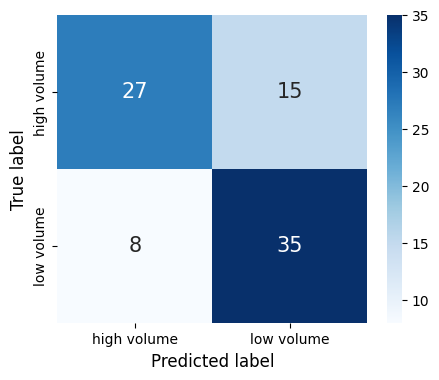

In [267]:
from sklearn import metrics
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5,4)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 15},
            xticklabels=class_names, yticklabels=class_names) # Add class names here
plt.title('', size=24) # Adjust title size as needed
plt.xlabel('Predicted label', size=12) # Adjust label size as needed
plt.ylabel('True label', size=12) # Adjust label size as needed
plt.xticks(rotation=0) # Optional: Rotate x-axis labels if needed
plt.yticks(rotation=90) # Optional: Rotate y-axis labels if needed
plt.show()

In [268]:
# classification report

print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.7714    0.6429    0.7013        42
           1     0.7000    0.8140    0.7527        43

    accuracy                         0.7294        85
   macro avg     0.7357    0.7284    0.7270        85
weighted avg     0.7353    0.7294    0.7273        85



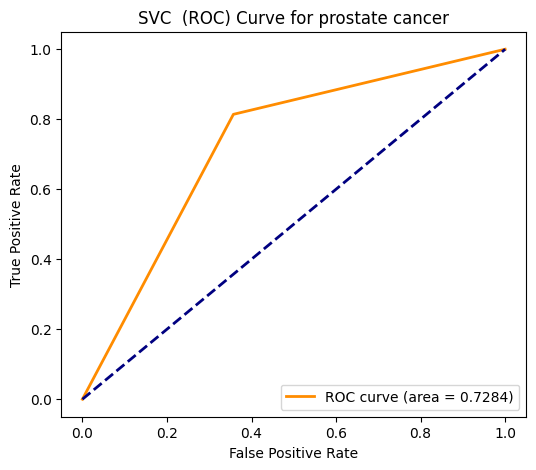

In [269]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC  (ROC) Curve for prostate cancer')
plt.legend(loc='lower right')
plt.show()

# Decision Tree Classifier

In [270]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 5),
    'min_samples_leaf' : range(1, 10, 3),
    'min_samples_split' : range(2, 10, 3),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, y_train)
print(grid_search_dt.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 8, 'splitter': 'random'}


In [271]:
best_dt = grid_search_dt.best_estimator_
y_pred = best_dt.predict(X_test)
# accuracy score

dtc_acc = accuracy_score(y_test, y_pred)
print(dtc_acc)

0.6705882352941176


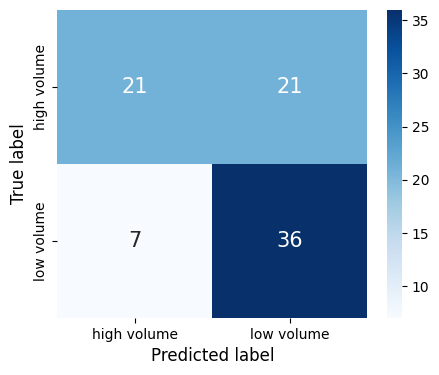

In [272]:
# confusion matrix
from sklearn import metrics
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5,4)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 15},
            xticklabels=class_names, yticklabels=class_names) # Add class names here
plt.title('', size=24) # Adjust title size as needed
plt.xlabel('Predicted label', size=12) # Adjust label size as needed
plt.ylabel('True label', size=12) # Adjust label size as needed
plt.xticks(rotation=0) # Optional: Rotate x-axis labels if needed
plt.yticks(rotation=90) # Optional: Rotate y-axis labels if needed
plt.show()

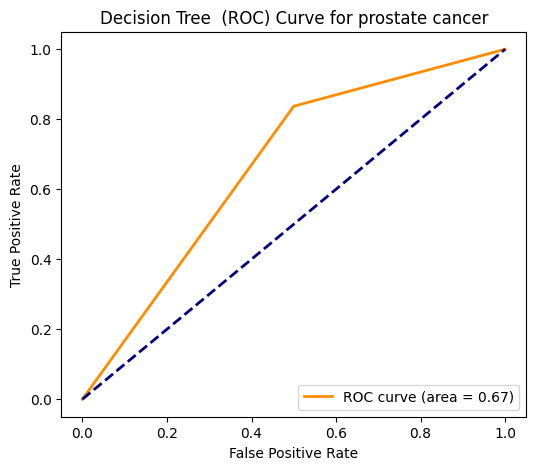

In [273]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree  (ROC) Curve for prostate cancer')
plt.legend(loc='lower right')
plt.show()

# Random Forest Classifier

In [274]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 150, 200],          # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [10, 11, 12],                 # Maximum number of levels in tree
    'criterion': ['gini', 'entropy']           # Function to measure the quality of a split
}

# Create a RandomForestClassifier instance
rand_clf = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV with the RandomForestClassifier, parameter grid, and cross-validation
grid_search = GridSearchCV(estimator=rand_clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', error_score=0)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

In [275]:
best_rand_forest=grid_search.best_estimator_

y_pred = best_rand_forest.predict(X_test)
# accuracy score

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.6941176470588235


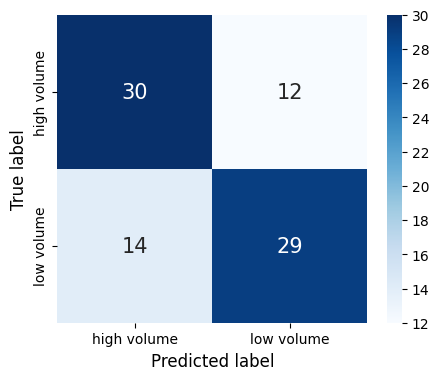

In [ ]:
# confusion matrix
from sklearn import metrics
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5,4)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 15},
            xticklabels=class_names, yticklabels=class_names) # Add class names here
plt.title('', size=24) # Adjust title size as needed
plt.xlabel('Predicted label', size=12) # Adjust label size as needed
plt.ylabel('True label', size=12) # Adjust label size as needed
plt.xticks(rotation=0) # Optional: Rotate x-axis labels if needed
plt.yticks(rotation=90) # Optional: Rotate y-axis labels if needed
plt.show()

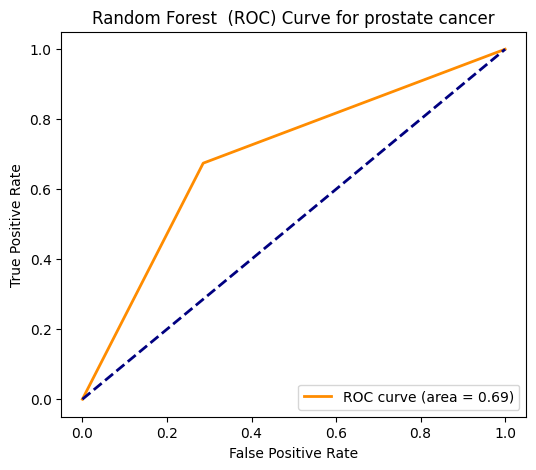

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest  (ROC) Curve for prostate cancer')
plt.legend(loc='lower right')
plt.show()

# Extreme Gradient Boosting

In [276]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.1, 0.5, 1.0],  # Learning rate
    'max_depth': [3, 4, 5],            # Maximum depth of the tree
    'n_estimators': [150, 180, 200]     # Number of boosting rounds
}

# Create an XGBClassifier instance
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Instantiate GridSearchCV with the XGBClassifier, parameter grid, and cross-validation
xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', error_score=0)

# Perform grid search on the training data
xgb.fit(X_train, y_train)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_


print("Best Parameters: ", best_params)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 100}


0.6941176470588235


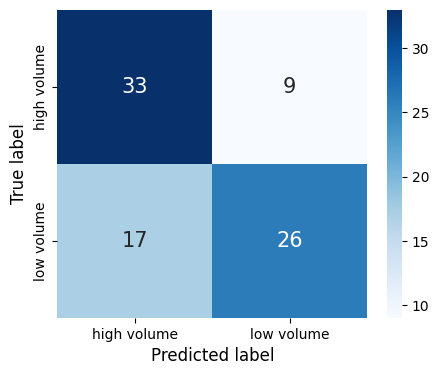

In [277]:
best_xgb=xgb.best_estimator_
y_pred = best_xgb.predict(X_test)
# accuracy score

xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)

# confusion matrix
from sklearn import metrics
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5,4)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 15},
            xticklabels=class_names, yticklabels=class_names) # Add class names here
plt.title('', size=24) # Adjust title size as needed
plt.xlabel('Predicted label', size=12) # Adjust label size as needed
plt.ylabel('True label', size=12) # Adjust label size as needed
plt.xticks(rotation=0) # Optional: Rotate x-axis labels if needed
plt.yticks(rotation=90) # Optional: Rotate y-axis labels if needed
plt.show()

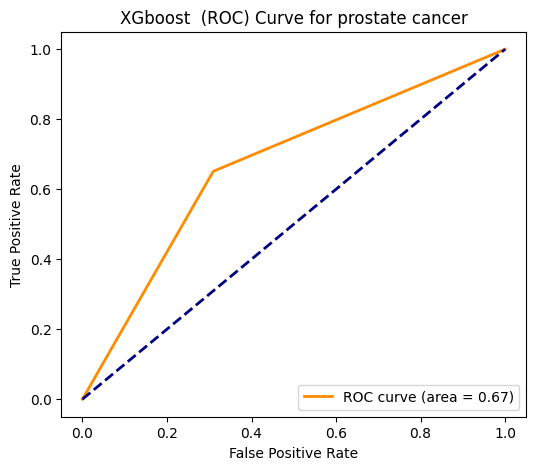

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGboost  (ROC) Curve for prostate cancer')
plt.legend(loc='lower right')
plt.show()

# camparison

In [278]:
models = pd.DataFrame({
    'Model': ['SVC',  'Decision Tree Classifier', 'Random Forest Classifier',
              'XgBoost'],
    'Score': [ svc_acc, dtc_acc, ran_clf_acc, xgb_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,SVC,0.729412
2,Random Forest Classifier,0.694118
3,XgBoost,0.694118
1,Decision Tree Classifier,0.670588
